# CAR PRICE PREDICTION PROJECT:

# Phase II

Name: Vaibhav Tayade

contact details: 8087970061

Email Id: vaibhav_t29@rediffmail.com

# IMPORTING RELEVANT LIBRARIES:

In [1]:
# Importing libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# IMPORTING THE DATASETS:

In [2]:
# reading csv file and creating dataframe:
df = pd.read_csv('car_price_prediction_datafile.csv')

In [3]:
# checking head of the dataset
df.head()

,Unnamed: 0,Car Modelname,RunningKm,City,Car Price
0,0,"Maruti Suzuki Celerio VXI MT, 2018, Petrol","2018 - 52,000 km","POLO FIELD, TEZPUR","₹ 4,25,000"
1,1,"Skoda Rapid 1.5 TDI Style/1.5 AT Style, 2016, ...","2016 - 50,000 km","POWAI, MUMBAI","₹ 7,25,000"
2,2,"Audi Q7 3.0 TDI Quattro Technology, 2014, Diesel","2014 - 35,620 km","MIDC AMBAD, NASHIK","₹ 30,00,000"
3,3,Maruti Suzuki Estilo 2009 CNG & Hybrids,"2009 - 70,000 km","NARELA, DELHI","₹ 1,50,000"
4,4,Tata Indica 2005 Diesel,"2005 - 70,000 km","MANDVI, MUMBAI","₹ 75,000"


In [4]:
# checking tail of the dataset
df.tail()

,Unnamed: 0,Car Modelname,RunningKm,City,Car Price
4115,4115,Maruti Suzuki Swift Dzire,"2012 - 154,500 km","BELAVALI, BADLAPUR","₹ 4,30,000"
4116,4116,"Volkswagen Polo 1.0 MPI Highline, 2013, Diesel","2013 - 90,000 km","BENZCO, VIJAYAWADA","₹ 3,20,000"
4117,4117,"Mahindra Xylo H8 ABS Airbag BS IV, 2018, Diesel","2018 - 87,500 km","THANJAVUR, TAMIL NADU","₹ 8,41,000"
4118,4118,Ac full working goverment car,"2012 - 100,000 km","RAIPUR, CHHATTISGARH","₹ 75,000"
4119,4119,"Tata Nano 2011 Petrol 50000 Km Driven, well ma...","2011 - 50,000 km","TETAVLI, THANE","₹ 55,000"


In [5]:
# checking shape of the dataset
df.shape

(4120, 5)

In [6]:
# checking column headings of the dataset
df.columns

Index(['Unnamed: 0', 'Car Modelname', 'RunningKm', 'City', 'Car Price'], dtype='object')

In [7]:
# checking unique values of the dataset
df.nunique()

Unnamed: 0       4120
Car Modelname     428
RunningKm         399
City              305
Car Price         221
dtype: int64

In [8]:
# checking overview of the whole dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4120 non-null   int64 
 1   Car Modelname  4120 non-null   object
 2   RunningKm      4120 non-null   object
 3   City           4120 non-null   object
 4   Car Price      4120 non-null   object
dtypes: int64(1), object(4)
memory usage: 161.1+ KB


In [9]:
# checking unique values of 'Car Modelname' column
df['Car Modelname'].unique()

array(['Maruti Suzuki Celerio VXI MT, 2018, Petrol',
       'Skoda Rapid 1.5 TDI Style/1.5 AT Style, 2016, Diesel',
       'Audi Q7 3.0 TDI Quattro Technology, 2014, Diesel',
       'Maruti Suzuki Estilo 2009 CNG & Hybrids',
       'Tata Indica 2005 Diesel', 'Maruti Suzuki Ciaz, 2021, Petrol',
       'Audi Q5 2.0 TDI quattro, 2011, Diesel',
       'Toyota Others, 2021, Petrol',
       'Maruti Suzuki S Cross 2015-2017 DDiS 200 Zeta, 2016, Diesel',
       'Audi Q3 2.0 TDI Quattro Premium Plus, 2013, Diesel',
       'Audi A4 35 QL TFSI Premium Plus, 2015, Diesel',
       'Hyundai i10 1.2 Kappa Magna, 2013, Petrol',
       'Hyundai Grand i10 1.2 CRDi Sportz, 2016, CNG & Hybrids',
       'Skoda Rapid 2011', 'Porsche Cayenne 2003-2014 S, 2012, Petrol',
       'Audi A4 3.0 TDI quattro Premium Plus, 2015, Diesel',
       'Mahindra XUV500 2011-2015 W8 2WD, 2015, Diesel',
       'Land Rover Range Velar D300 R-Dynamic HSE, 2019, Petrol',
       'Hyundai Creta 1.6 SX, 2019, Petrol',
       'Hyunda

# DATA CLEANING PROCESS:

In [10]:
# editing car price column
# car price columns has 'comma' in its values which makes it string datatype, we need to convert it to integer datatype
df['Car Price']=df['Car Price'].str.replace(',','')

In [11]:
# splitting car price column as its string column and making column pure numeric column out of it.
df["Car Price"] = df["Car Price"].str.split()
# making new column CarEstimatedPrice as integer datatype out of it.
df["CarEstimatedPrice"] = df["Car Price"].str[1].astype("int")

In [12]:
# splitting city column and making new maincity and suburb column out of it.
df["City"] = df["City"].str.split(",")
df["MainCity"] = df["City"].str[-1]
df["Suburb"] = df["City"].str[0]

In [13]:
# as runningKm column is string in nature we need to convert it to nuemeric column.
df["RunningKm"] = df["RunningKm"].str.split("-")
df["ManufacturingDate"] = df["RunningKm"].str[0]
df["KmRan"] = df["RunningKm"].str[-1]

In [14]:
# converting KMRan column to float column.
df["KmRan"]=df["KmRan"].str.replace(',','')
df["KmRan"] = df["KmRan"].str.split()
df["KilometersRan"] = df["KmRan"].str[0].astype("float")

In [15]:
# splitting Car Modelname column and making new carname column and fuel column out of it.
df["Car Modelname"] = df["Car Modelname"].str.split(",")
df["CarName"] = df["Car Modelname"].str[0]
df["Fuel"] = df["Car Modelname"].str[2]

In [16]:
# splitting carname column and making carmanufacturer and model columns out of it.
df["CarName"]=df["CarName"].str.split()
df["CarManufacturer"]=df["CarName"].str[0]
df["Model"]=df["CarName"].str[1]

In [17]:
#checking null values:
pd.set_option('display.max_rows', None)

In [18]:
#cleaning the dataset removing irrelevant entries
df1=df[df['CarManufacturer'] != 'Good']
df2=df1[df1['CarManufacturer'] != '2017']
df3=df2[df2['CarManufacturer'] != 'Other']
df4=df3[df3['CarManufacturer'] != 'Push']
df5=df4[df4['CarManufacturer'] != 'A']
df6=df5[df5['CarManufacturer'] != 'Full']
df7=df6[df6['CarManufacturer'] != 'Plot']
df8=df7[df7['CarManufacturer'] != '2014']
df9=df8[df8['CarManufacturer'] != 'Searching']
df10=df9[df9['CarManufacturer'] != 'Single']
df11=df10[df10['CarManufacturer'] != 'Total']
df12=df11[df11['CarManufacturer'] != 'Very']
df13=df12[df12['CarManufacturer'] != 'Amjad']
df14=df13[df13['CarManufacturer'] != 'Urgent']
df15=df14[df14['CarManufacturer'] != 'HDFC']
df16=df15[df15['CarManufacturer'] != 'Ac']

In [19]:
#cleaning the dataset
df17=df16[df16['Model'] != 'Others']
df18=df17[df17['Model'] != 'New']
df19=df18[df18['Model'] != '3']
df20=df19[df19['Model'] != '2005']
df21=df20[df20['Model'] != '2013']
df22=df21[df21['Model'] != '2007']

In [20]:
# rearranging the columns and making new dataframe out of it.
newdataframe= df22[["CarManufacturer","Model","ManufacturingDate","Fuel","KilometersRan","MainCity","Suburb","CarEstimatedPrice"]]

In [21]:
#cleaning the dataset
newdataframe['CarManufacturer']=newdataframe['CarManufacturer'].str.replace('Mahendra','Mahindra')
newdataframe['CarManufacturer']=newdataframe['CarManufacturer'].str.replace('MAHINDRA','Mahindra')
newdataframe['CarManufacturer']=newdataframe['CarManufacturer'].str.replace('MARUTI','Maruti')
newdataframe['CarManufacturer']=newdataframe['CarManufacturer'].str.replace('FORD','Ford')
newdataframe['CarManufacturer']=newdataframe['CarManufacturer'].str.replace('Hyundai.','Hyundai')
newdataframe['Model']=newdataframe['Model'].str.replace('SUZUKI','Suzuki')
newdataframe['Model']=newdataframe['Model'].str.replace('FIESTA','Fiesta')
newdataframe['Model']=newdataframe['Model'].str.replace('SCORPIO','Scorpio')
newdataframe['Model']=newdataframe['Model'].str.replace('bolero','Bolero')

In [22]:
dfnew = newdataframe

In [23]:
#checking datatypes of the dataframe
dfnew.dtypes

CarManufacturer       object
Model                 object
ManufacturingDate     object
Fuel                  object
KilometersRan        float64
MainCity              object
Suburb                object
CarEstimatedPrice      int32
dtype: object

In [24]:
# converting manufacturing date columns to age of the car:
# first converting manufacturingdate column to integer:
dfnew['ManufacturingDate'] = dfnew['ManufacturingDate'].astype("int")

In [25]:
# creating new column 'YearsOld' from ManufacturingDate column:
dfnew['YearsOld'] = 2021 - dfnew['ManufacturingDate']

In [26]:
# checking datatype of new column 'YearsOld':
dfnew['YearsOld'].dtype

dtype('int32')

In [27]:
# dropping old column 'ManufacturingDate':
dfnew = dfnew.drop(['ManufacturingDate'], axis = 1)

In [28]:
#checking datatypes of the dataframe:
dfnew.dtypes

CarManufacturer       object
Model                 object
Fuel                  object
KilometersRan        float64
MainCity              object
Suburb                object
CarEstimatedPrice      int32
YearsOld               int32
dtype: object

# EXPLORATORY DATA ANALYSIS:

In [29]:
dfnew.describe()

,KilometersRan,CarEstimatedPrice,YearsOld
count,3859.000000,3.859000e+03,3859.000000
mean,69074.441824,7.474891e+05,7.735683
std,49885.260063,1.077293e+06,4.435308
min,0.000000,2.600000e+04,0.000000
25%,45000.000000,2.500000e+05,4.000000
50%,64000.000000,4.500000e+05,7.000000
75%,85000.000000,7.750000e+05,10.000000
max,610000.000000,8.700000e+06,38.000000


Observation: We can see that from the above decription table of the dataset that, mean values are higher than the median values in almost all the columns which indicates presence of outliers and skewness in the dataset.

# 1) Checking Null Values:

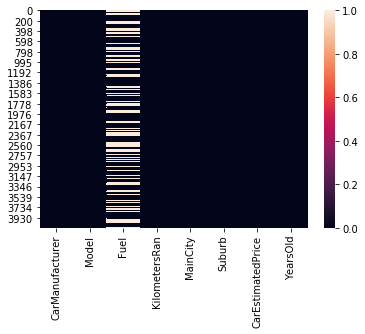

In [30]:
# checking null values using heatmap.
sns.heatmap(dfnew.isnull())

Observation: Fuel column has Null values in the dataset.

In [31]:
dfnew['Fuel'].value_counts()

 Diesel           1407
 Petrol           1007
 CNG & Hybrids      97
Name: Fuel, dtype: int64

In [32]:
#replacing null values of 'Fuel' column by mode values of the column.
dfnew['Fuel'].fillna(' Diesel', inplace=True)

In [33]:
dfnew['Fuel'].value_counts()

 Diesel           2755
 Petrol           1007
 CNG & Hybrids      97
Name: Fuel, dtype: int64

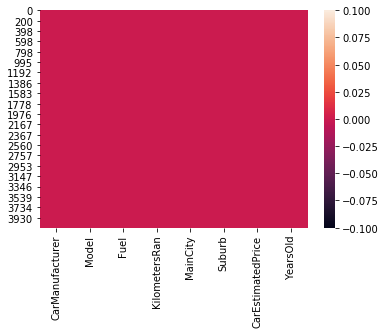

In [34]:
# checking null values using heatmap.
sns.heatmap(dfnew.isnull())

Observation: We can see that now there are no Null values in the dataset.

# 2) Checking Outliers:

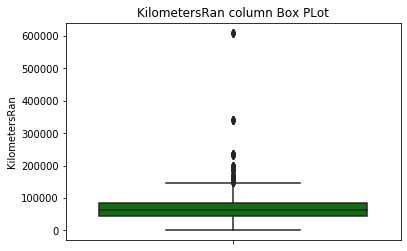

In [35]:
# 1 - BoxPlot of 'KilometersRan' column:
plt.title('KilometersRan column Box PLot')
sns.boxplot(dfnew['KilometersRan'],color='green',orient='v')

Observation: We can say that there are outliers present in the KilometersRan column.

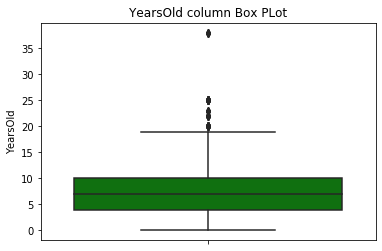

In [36]:
# 2 - BoxPlot of 'YearsOld' column:
plt.title('YearsOld column Box PLot')
sns.boxplot(dfnew['YearsOld'],color='green',orient='v')

Observation: We can say that there are outliers present in the YearsOld column.

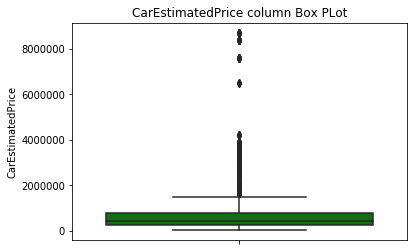

In [37]:
# 3 - BoxPlot of 'CarsEstimatedPrice' column:
plt.title('CarEstimatedPrice column Box PLot')
sns.boxplot(dfnew['CarEstimatedPrice'],color='green',orient='v')

Observation: We can say that there are outliers present in the CarEstimatedPrice column.

# 3) Checking Skewness:

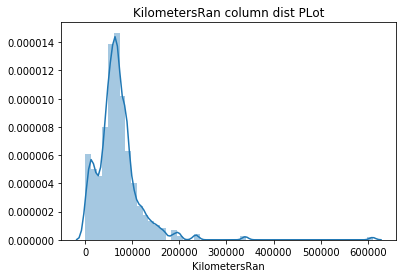

In [38]:
# distplot 1>>>
plt.title('KilometersRan column dist PLot')
sns.distplot(dfnew['KilometersRan'])

Observation: 'KilometersRan' Column is Right-hand side skewed.

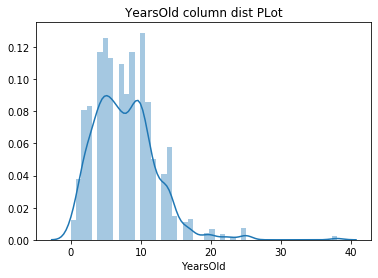

In [39]:
# distplot 2>>>
plt.title('YearsOld column dist PLot')
sns.distplot(dfnew['YearsOld'])

Observation: 'YearsOld' Column is Right-hand side skewed.

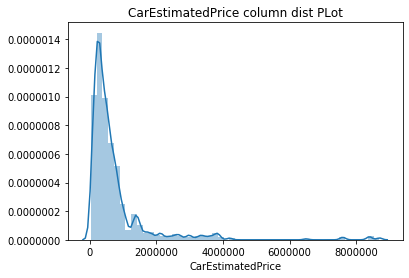

In [40]:
# distplot 3>>>
plt.title('CarEstimatedPrice column dist PLot')
sns.distplot(dfnew['CarEstimatedPrice'])

Observation: 'CarEstimatedPrice' Column is Right-hand side skewed.

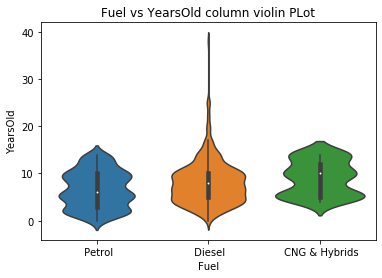

In [41]:
# violinplot of Fuel vs YearsOld column
plt.title('Fuel vs YearsOld column violin PLot')
ax = sns.violinplot(x="Fuel", y="YearsOld", data=dfnew)

Observation: We can see that Diesel has more datasets with respect to petrol and CNG-Hybrid cars with YearsOld data.

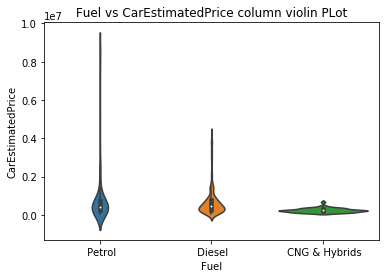

In [42]:
plt.title('Fuel vs CarEstimatedPrice column violin PLot')
ax = sns.violinplot(x="Fuel", y="CarEstimatedPrice", data=dfnew)

Observation: We can see that Petrol cars are highly priced than Diesel cars while CNG&Hybrid cars are least priced.    

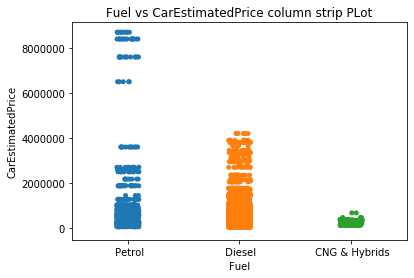

In [43]:
plt.title('Fuel vs CarEstimatedPrice column strip PLot')
ax = sns.stripplot(x="Fuel", y="CarEstimatedPrice", data=dfnew)

Observation: We can see that Petrol cars are highly priced than Diesel cars while CNG&Hybrid cars are least priced.    

Text(0.5, 1, 'CarEstimatedPrice vs Fuel column Factor PLot')

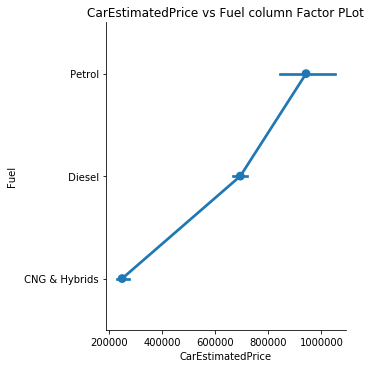

In [44]:
sns.factorplot(x ='CarEstimatedPrice', y ='Fuel', data = dfnew)
plt.title('CarEstimatedPrice vs Fuel column Factor PLot')

Observation: We can see that Petrol cars are highly priced than Diesel cars while CNG&Hybrid cars are least priced.    

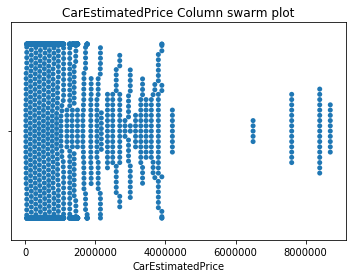

In [45]:
plt.title('CarEstimatedPrice Column swarm plot')
ax = sns.swarmplot(x=dfnew["CarEstimatedPrice"])

Observation: we can see that from the above swarmplot CarEstimatedPrice datasets are majorly in the 0 to 4lks price range and very less values in the high price range.

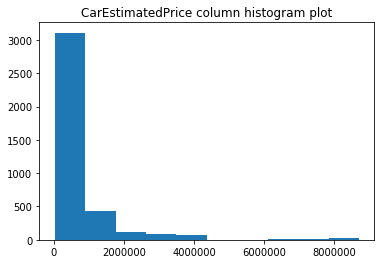

In [46]:
# Creating histogram
fig, ax = plt.subplots(figsize =(6, 4))
ax.hist(dfnew['CarEstimatedPrice'])
plt.title('CarEstimatedPrice column histogram plot')
# Show plot
plt.show()

Observation: we can see that from the above histogram plot CarEstimatedPrice datasets are majorly in the 0 to 4lks price range and in that also majorly in the 0 to 2lks price range and very less values in the high price range.

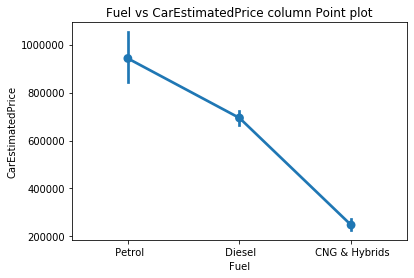

In [47]:
# creating Point plot of CarEstimatedPrice using Fuel type.
# loading dataset
data = dfnew
plt.title('Fuel vs CarEstimatedPrice column Point plot')
# draw pointplot
sns.pointplot(x = "Fuel",
              y = "CarEstimatedPrice",
              data = data)
# show the plot
plt.show()

Observation: We can see that Petrol cars are highly priced than Diesel cars while CNG&Hybrid cars are least priced.

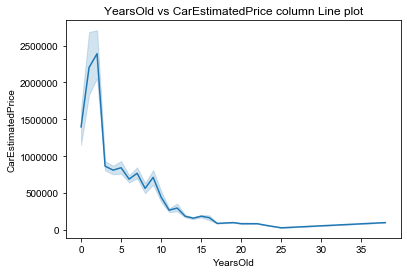

In [48]:
# creating lineplot of Yearsold vs CarEstimatedPrice.
plt.title('YearsOld vs CarEstimatedPrice column Line plot')
sns.set_style("darkgrid")
sns.lineplot(data=dfnew, x="YearsOld", y="CarEstimatedPrice")

Observation: We can see that from the above lineplot, YearsOld values are inversely proportional to the CarsEstimatedPrice columns.

Text(0.5, 1, 'CarEstimatedPrice vs YearsOld column Lmplot')

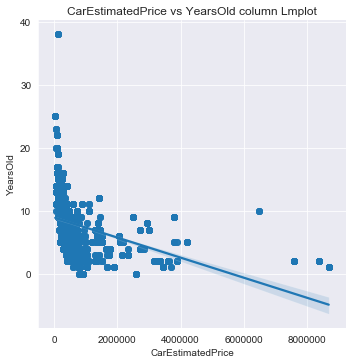

In [49]:
# creating lmplot of Yearsold vs CarEstimatedPrice.
g = sns.lmplot(x="CarEstimatedPrice", y="YearsOld", data=dfnew)
plt.title('CarEstimatedPrice vs YearsOld column Lmplot')

Observation: We can see that from the above lmplot, YearsOld values are inversely proportional to the CarsEstimatedPrice columns.we can also see the distribution of the datasets in the in the graphs.

Text(0.5, 1.0, 'KilometersRan vs CarEstimatedPrice column Line plot')

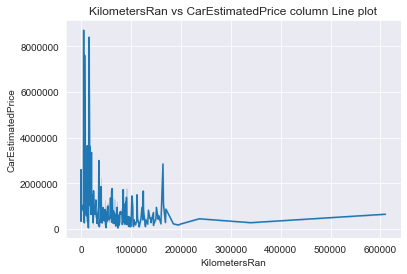

In [50]:
# creating lineplot of KilometersRan vs CarEstimatedPrice.
sns.set_style("darkgrid")
sns.lineplot(data=dfnew, x="KilometersRan", y="CarEstimatedPrice")
plt.title('KilometersRan vs CarEstimatedPrice column Line plot')

Observation: We can see that from the above lineplot that 'KilometersRan' column are inversely proportional to the CarEstimatedPrice colum, but datasets distribution are very much widely distributed.

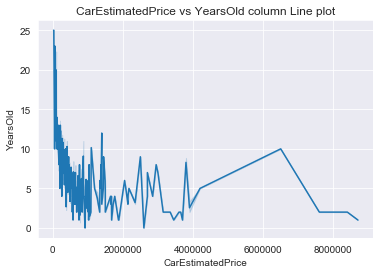

In [51]:
# creating lineplot of CarEstimatedPrice vs YearsOld.
plt.title('CarEstimatedPrice vs YearsOld column Line plot')
sns.set_style("darkgrid")
sns.lineplot(data=dfnew, x="CarEstimatedPrice", y="YearsOld")

Observation: We can see that from the above lineplot that 'YearsOld' column are inversely proportional to the CarEstimatedPrice colum, but datasets distribution are very much widely distributed.

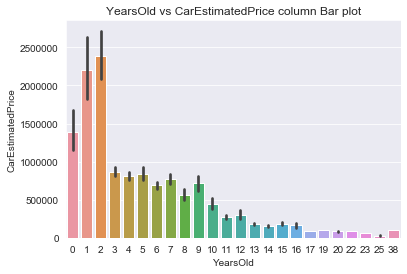

In [52]:
# creating Bar plot of CarEstimatedPrice vs YearsOld.
plt.title('YearsOld vs CarEstimatedPrice column Bar plot')
sns.barplot(data=dfnew, x="YearsOld", y="CarEstimatedPrice")

Observation: We can see that from the above barplot that 'YearsOld' column are inversely proportional to the CarEstimatedPrice colum, but datasets distribution are very much widely distributed. we have 1 and 2 yearsold cars having highly priced with respect to others while cars more than 12 years old are very mcuh less priced.

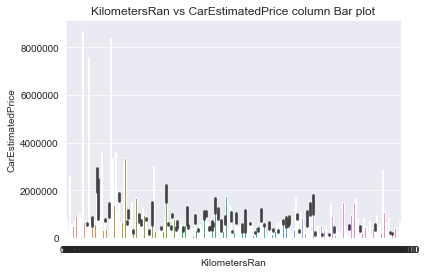

In [53]:
# creating bar plot of KilometersRan vs CarEstimatedPrice.
plt.title('KilometersRan vs CarEstimatedPrice column Bar plot')
sns.barplot(data=dfnew, x="KilometersRan", y="CarEstimatedPrice")

Observation: KilometersRan column is inversely proportional to the CarsEstimatedPrice column.

Text(0.5, 1, 'CarEstimatedPrice vs KilometersRan column Joint plot')

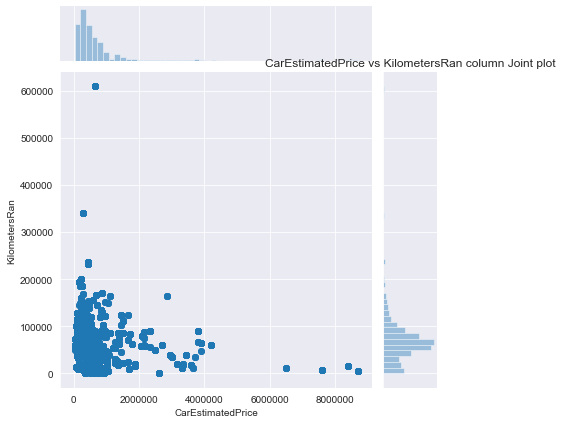

In [54]:
# creating jointplot of CarEstimatedPrice vs KilometersRan columns.
sns.jointplot(data=dfnew, x="CarEstimatedPrice", y="KilometersRan")
plt.title('CarEstimatedPrice vs KilometersRan column Joint plot')

Observation: We can see the data distribution in the above joint plot, we can see that Cars Price are widely distribited between 0 to 4 lks and KilometersRan values of 0 to 2 lks Kms.

Text(0.5, 1, 'CarEstimatedPrice vs YearsOld column Joint plot')

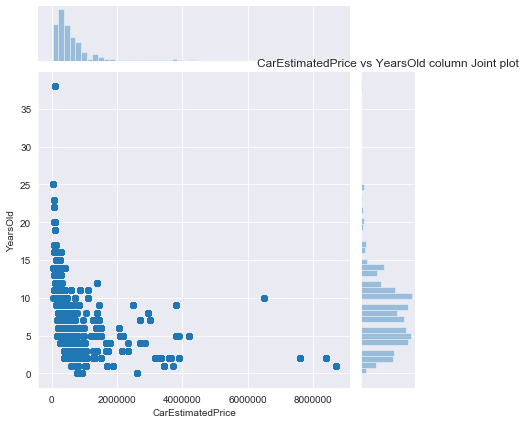

In [55]:
# creating jointplot of CarEstimatedPrice vs YearsOld columns
sns.jointplot(data=dfnew, x="CarEstimatedPrice", y="YearsOld")
plt.title('CarEstimatedPrice vs YearsOld column Joint plot')

Observation: We can see the data distribution in the above joint plot, we can see that Cars Price are widely distribited between 0 to 4 lks and YearsOld values of 0 to 15 years.

In [56]:
#checking amount of skewness in the dataset:
dfnew.skew()

KilometersRan        4.237455
CarEstimatedPrice    4.431625
YearsOld             1.231332
dtype: float64

Observation: we can see the amount of skewness in the above code. CarEstimatedPrice column is highly skewed while YearsOld column is less skewness comparately.

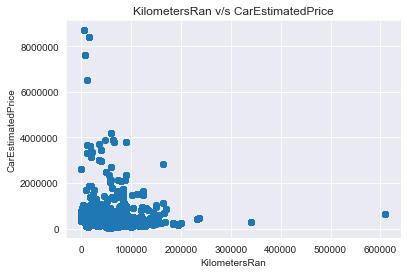

In [57]:
#Scatter Plot - 1.
plt.scatter(dfnew['KilometersRan'],dfnew['CarEstimatedPrice'])
plt.xlabel('KilometersRan')
plt.ylabel('CarEstimatedPrice')
plt.title('KilometersRan v/s CarEstimatedPrice')
plt.show()

Observation: We can see that kilometersRan column is inversely proportional to the CarEstimatedPrice column.
    Less the KilometerRan value medium to high the price is while High the value of KilometersRan column is Less the price.

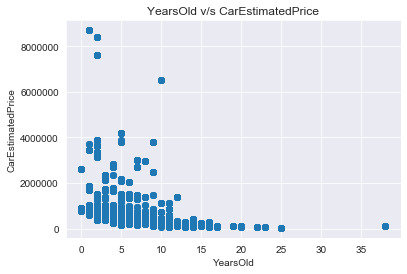

In [58]:
#Scatter Plot - 2.
plt.scatter(dfnew['YearsOld'],dfnew['CarEstimatedPrice'])
plt.xlabel('YearsOld')
plt.ylabel('CarEstimatedPrice')
plt.title('YearsOld v/s CarEstimatedPrice')
plt.show()

Observation: YearsOld column is also seems to be inversely proportional to CarEstimatedPrice. Less yearsold value is medium to high price of car it is, and while more the yearsold value is less the price of the car.

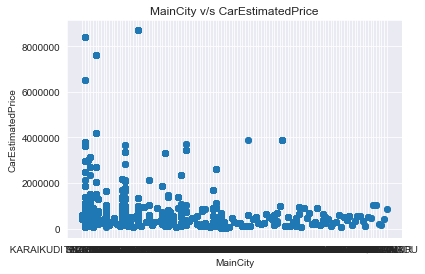

In [59]:
#Scatter Plot - 3.
plt.scatter(dfnew['MainCity'],dfnew['CarEstimatedPrice'])
plt.xlabel('MainCity')
plt.ylabel('CarEstimatedPrice')
plt.title('MainCity v/s CarEstimatedPrice')
plt.show()

Observation: We can see the city wise distribution of cars estimated prices.

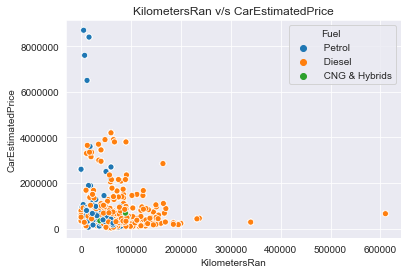

In [60]:
# scatter plot - 4
sns.scatterplot(dfnew['KilometersRan'],dfnew['CarEstimatedPrice'],hue=dfnew['Fuel'])
plt.xlabel('KilometersRan')
plt.ylabel('CarEstimatedPrice')
plt.title('KilometersRan v/s CarEstimatedPrice')
plt.show()

Observation:
    1) we can see that petrol cars are highly priced if they are less KilometerRan
    2) Diesel cars are usually less priced than Petrol Cars if they are less driven.

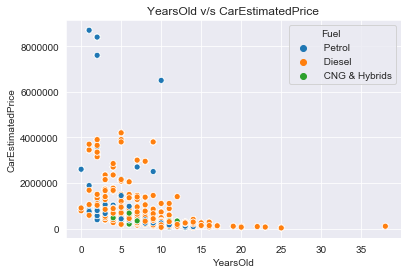

In [61]:
#Scatter Plot - 5.
sns.scatterplot(dfnew['YearsOld'], dfnew['CarEstimatedPrice'], hue=dfnew['Fuel'])
plt.xlabel('YearsOld')
plt.ylabel('CarEstimatedPrice')
plt.title('YearsOld v/s CarEstimatedPrice')
plt.show()

Observation: 1) we can see that petrol cars are highly priced if they are less YearsOld. 2) Diesel cars are usually less priced than Petrol Cars if they are less YearsOld.

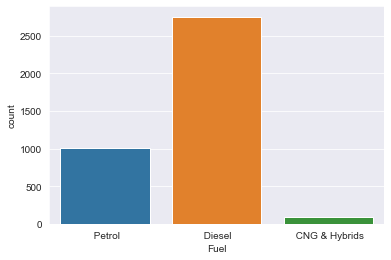

In [62]:
# checking fuel types entries using count plot:
import seaborn as sns
ax = sns.countplot(x='Fuel', data = dfnew)

Observation: We can see the dataset distribution, Diesel cars are having high dataset while Petrol cars next to that while CNG & Hybrid having least datasets.

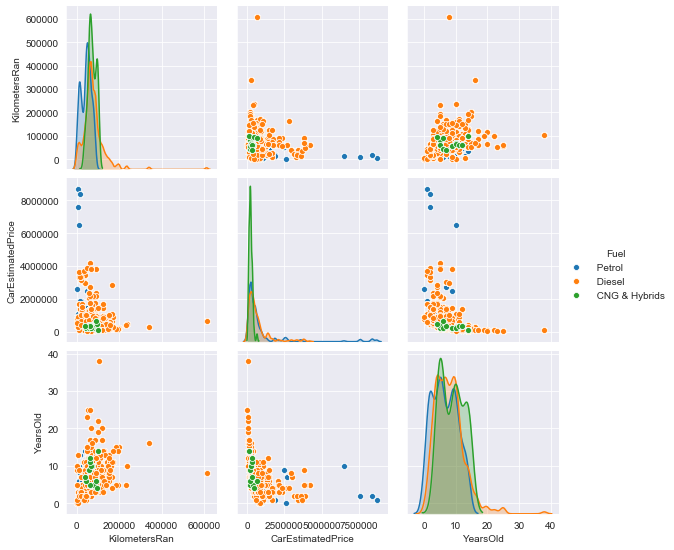

In [63]:
# checking pairplot of the dataset.
sns.pairplot(dfnew, hue = 'Fuel')

Observation: We can see the correlation plots of various columns with eachother.

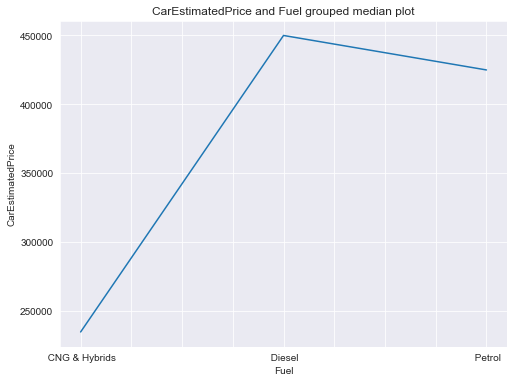

In [64]:
# median plot of carestimatedprice and fuel columns grouped together.
plt.figure(figsize=(8,6))
dfnew.groupby('Fuel')['CarEstimatedPrice'].median().plot()
plt.xlabel('Fuel')
plt.ylabel('CarEstimatedPrice')
plt.title("CarEstimatedPrice and Fuel grouped median plot")
plt.show()

Observation: We can see that Diesel cars highly priced but we should also keep one thing in consideration that we have more datasets Diesel car values while petrol and CNG-Hybrid less priced.

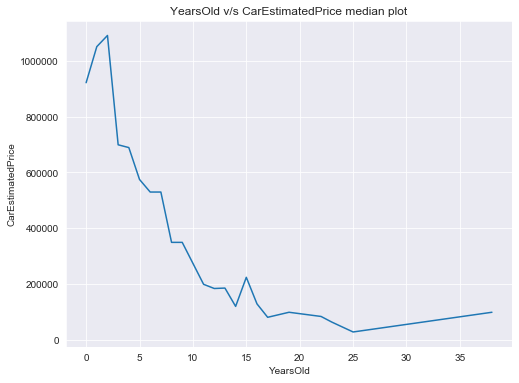

In [65]:
# Median Plot of YearsOld v/s CarextimatedPrice column.
plt.figure(figsize=(8,6))
dfnew.groupby('YearsOld')['CarEstimatedPrice'].median().plot()
plt.xlabel('YearsOld')
plt.ylabel('CarEstimatedPrice')
plt.title("YearsOld v/s CarEstimatedPrice median plot")
plt.show()

Observation: We can see that from the above median plot, YearsOld column is inversely proportional to CarEstimatedPrice column.

# LABEL ENCODING THE CATEGORICAL COLUMNS:

In [66]:
# Label Encoding the Categorical columns.
LE = LabelEncoder()
dfnew['CarManufacturer'] = LE.fit_transform(dfnew['CarManufacturer'])

In [67]:
dfnew['Model'] = LE.fit_transform(dfnew['Model'])
dfnew['Fuel'] = LE.fit_transform(dfnew['Fuel'])
dfnew['MainCity'] = LE.fit_transform(dfnew['MainCity'])
dfnew['Suburb'] = LE.fit_transform(dfnew['Suburb'])

# REMOVING OUTLIERS USING  Z-SCORE METHODS:

In [68]:
#Removing Outliers:
from scipy.stats import zscore
z=np.abs(zscore(dfnew))
z

array([[0.00789938, 0.62103962, 1.59179157, ..., 0.50166738, 0.29939012,
        1.06786202],
       [1.32059499, 0.16275644, 0.49119374, ..., 0.52597121, 0.02087826,
        0.61687657],
       [1.59650637, 0.12456617, 0.49119374, ..., 0.01559061, 2.09117002,
        0.16589112],
       ...,
       [1.90401527, 0.02819489, 0.49119374, ..., 1.35757627, 0.39686927,
        0.0596016 ],
       [0.13795569, 1.3084644 , 0.49119374, ..., 1.38875748, 0.08681299,
        1.06786202],
       [1.61230513, 0.14276568, 0.49119374, ..., 1.35230172, 0.64288808,
        0.51058705]])

In [69]:
threshold = 3
print(np.where(z>3))

(array([  17,   55,   86,  128,  159,  206,  239,  270,  317,  360,  364,
        365,  387,  418,  465,  508,  512,  513,  519,  540,  571,  602,
        649,  692,  696,  697,  703,  724,  749,  757,  767,  794,  825,
        872,  915,  919,  920,  926,  947,  972,  980,  990, 1012, 1056,
       1087, 1134, 1177, 1181, 1182, 1188, 1209, 1234, 1242, 1252, 1274,
       1325, 1356, 1387, 1434, 1477, 1481, 1482, 1488, 1509, 1534, 1542,
       1552, 1574, 1625, 1651, 1695, 1726, 1773, 1816, 1820, 1821, 1827,
       1848, 1873, 1881, 1891, 1913, 1964, 1990, 2070, 2101, 2148, 2191,
       2195, 2196, 2202, 2223, 2248, 2256, 2266, 2288, 2339, 2365, 2484,
       2515, 2562, 2605, 2609, 2610, 2616, 2637, 2662, 2670, 2680, 2702,
       2753, 2779, 2914, 2936, 2967, 3014, 3057, 3061, 3062, 3068, 3089,
       3114, 3122, 3132, 3154, 3205, 3231, 3366, 3377, 3406, 3437, 3484,
       3527, 3531, 3532, 3538, 3559, 3584, 3592, 3602, 3624, 3675, 3701,
       3836, 3847], dtype=int64), array([6, 6, 3, 

In [70]:
# creating new dataset without outliers and skewness
df_new = dfnew[(z<3).all(axis=1)]
df_new

,CarManufacturer,Model,Fuel,KilometersRan,MainCity,Suburb,CarEstimatedPrice,YearsOld
0,14,71,2,52000.0,102,179,425000,3
1,23,59,1,50000.0,72,181,725000,5
2,3,58,1,35620.0,75,139,3000000,7
3,14,71,1,70000.0,25,157,150000,12
4,25,35,1,70000.0,72,128,75000,16
5,14,71,2,1900.0,53,174,921000,0
6,3,57,1,86300.0,75,147,1100000,10
9,14,71,1,35000.0,53,103,600000,5
10,3,56,1,63000.0,27,221,1375000,8
11,3,0,1,85000.0,27,221,1495000,6


In [71]:
# checking data loss by removing the outliers:
print(((dfnew.shape[0]-df_new.shape[0])/dfnew.shape[0]*100))

3.7574501166105208


Observation: We can see that after removing Outliers we are loosing almost 3.75 percentage of data, which is very much in limit.

# CORRELATION MATRIX:

In [72]:
# checking correlation matrix:
dfcor = df_new.corr()
dfcor

,CarManufacturer,Model,Fuel,KilometersRan,MainCity,Suburb,CarEstimatedPrice,YearsOld
CarManufacturer,1.000000,0.106395,-0.095587,0.127625,0.027572,-0.144221,0.154188,-0.047309
Model,0.106395,1.000000,-0.003145,0.013809,0.171443,0.020950,-0.123586,0.141820
Fuel,-0.095587,-0.003145,1.000000,-0.308882,-0.015823,0.055019,-0.012173,-0.117922
KilometersRan,0.127625,0.013809,-0.308882,1.000000,0.086718,-0.035313,-0.173196,0.453971
MainCity,0.027572,0.171443,-0.015823,0.086718,1.000000,0.204416,-0.047481,0.114939
Suburb,-0.144221,0.020950,0.055019,-0.035313,0.204416,1.000000,0.044404,-0.116512
CarEstimatedPrice,0.154188,-0.123586,-0.012173,-0.173196,-0.047481,0.044404,1.000000,-0.457485
YearsOld,-0.047309,0.141820,-0.117922,0.453971,0.114939,-0.116512,-0.457485,1.000000


# HEATMAP OF CORRELATION MATRIX:

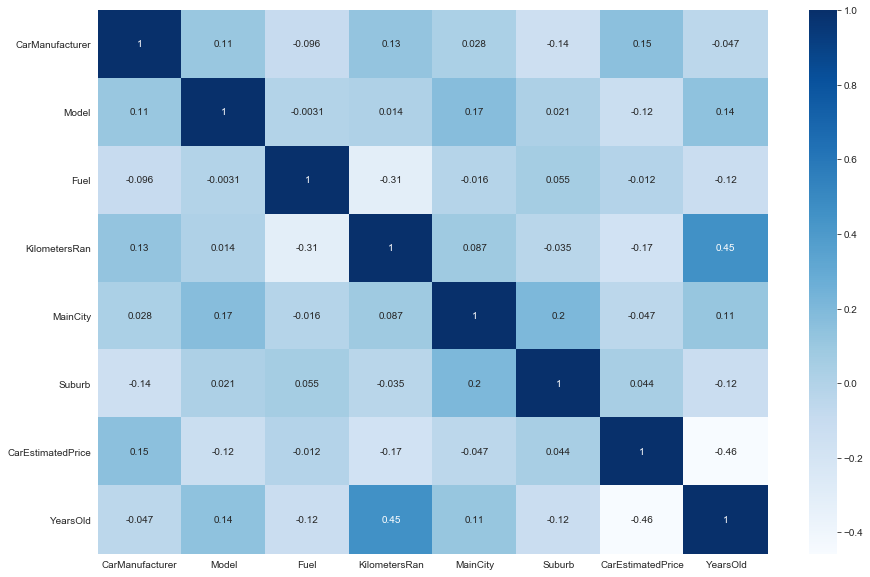

In [73]:
# checking heatmap of correlation matrix:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor, cmap='Blues', annot=True)

OBSERVATION: 
    
1) CarManufacturer column is highly coorelated with CarEstimatedPrice column with respect to all other columns.
2) YearsOld column is negatively 0.46 units correlated with CarEstimatedPrice column.

# PAIRPLOT OF CORRELATION MATRIX:

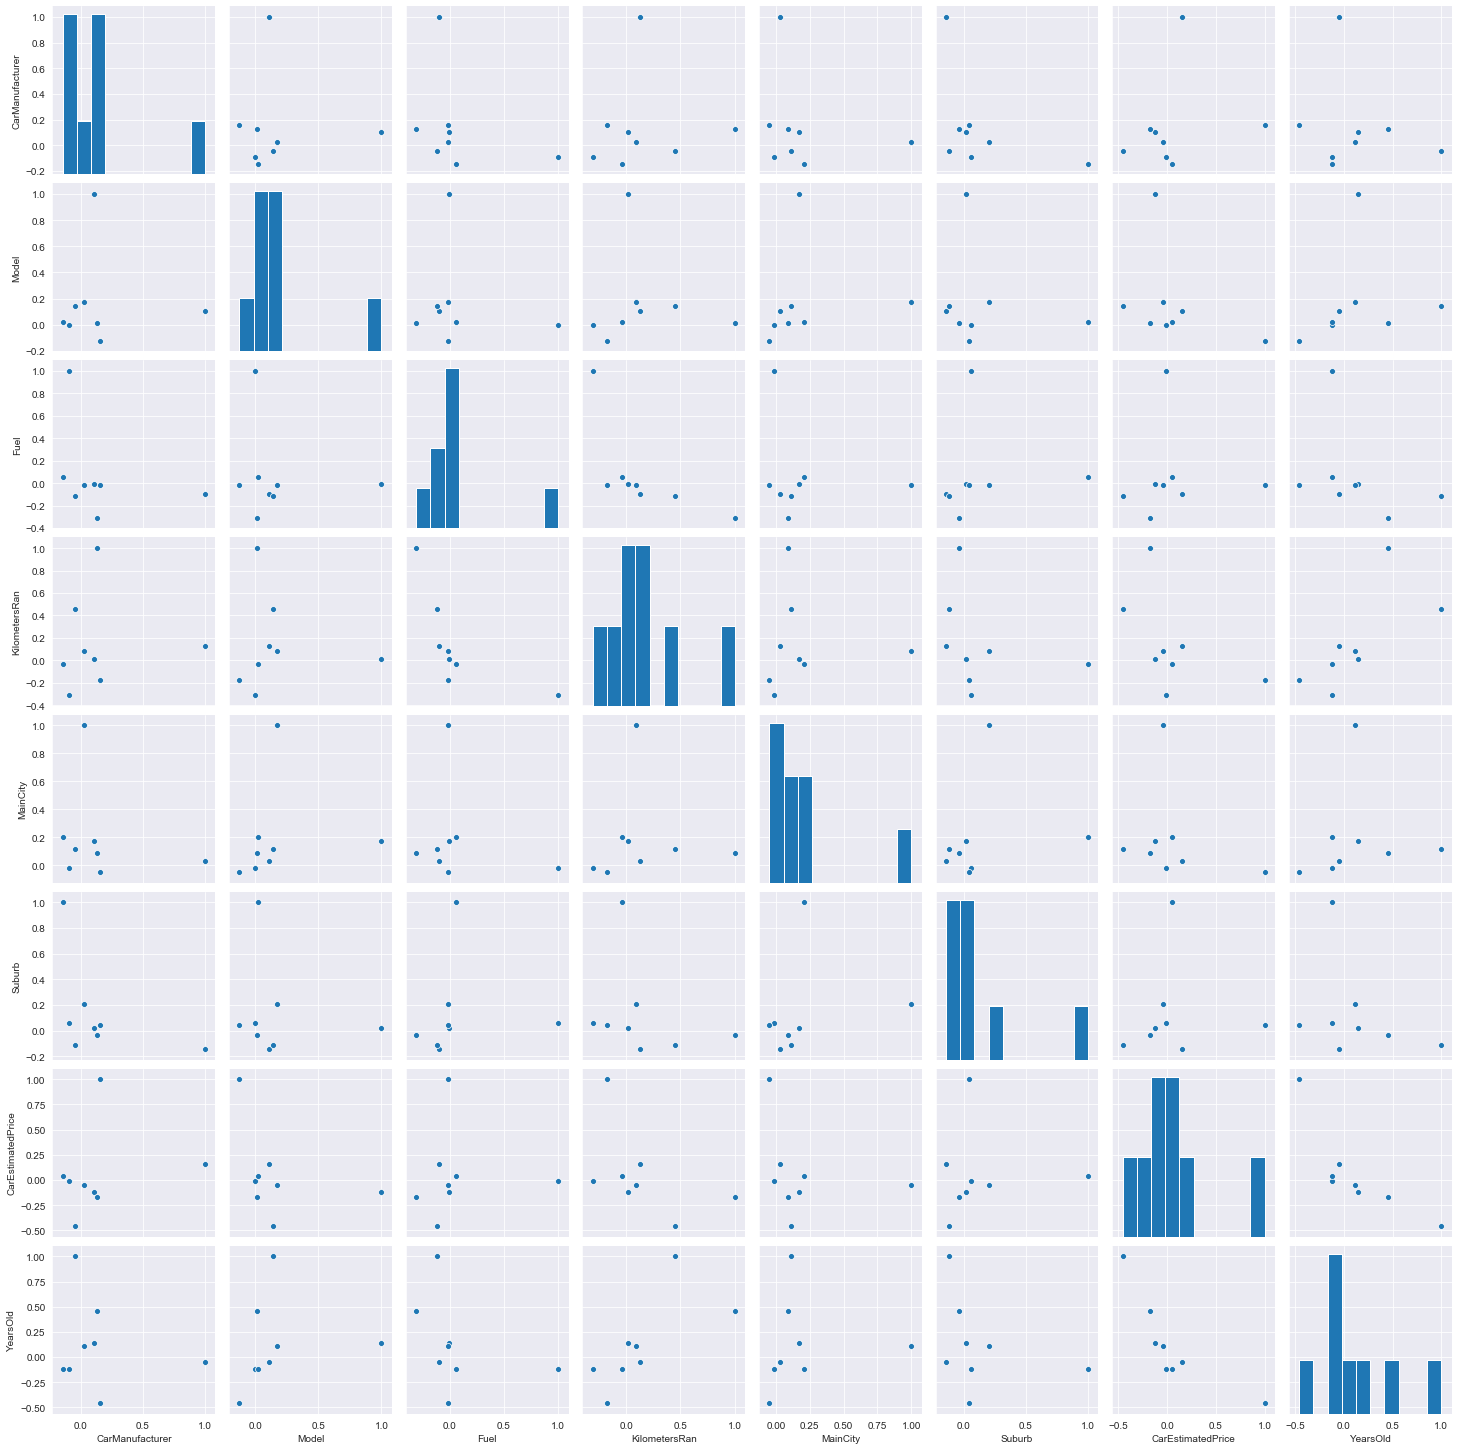

In [74]:
# checking the pairplot of correlation matrix:
sns.pairplot(dfcor)

In [75]:
# rearranging the columns:
df_new = df_new[["CarManufacturer", "Model", "Fuel", "KilometersRan", "MainCity", "Suburb", "YearsOld","CarEstimatedPrice"]]

# Creating X Y Dataset:

In [76]:
# creating x,y dataset for further model building.
x = df_new.iloc[:,0:7]
y = df_new.iloc[:,-1]

# SCALING THE DATASET:

In [77]:
#Scaling the dataset::
sc = StandardScaler()
x_scaled= sc.fit_transform(x)
columnslist = ["CarManufacturer", "Model", "Fuel", "KilometersRan", "MainCity", "Suburb", "YearsOld"]
X = pd.DataFrame(x_scaled, columns = columnslist)

# Creating Train Test Dataset:

In [78]:
#creating train test dataset from the x and y part inoder to start model making.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2971, 7)
(2971,)
(743, 7)
(743,)


# LINEAR REGRESSION MODEL:

In [79]:
# Linear Regression model making:
lm = LinearRegression()
lm.fit(x_train, y_train)

print('linearRegression Coeffient', lm.coef_)
print('linearRegression Intercept', lm.intercept_)
print('linearRegression score', lm.score(x_train, y_train))

# predicting x_test values
y_pred = lm.predict(x_test)
y_pred

linearRegression Coeffient [ 101119.30860121  -50949.444111    -35223.03579475   -2664.91211411
    5897.12047976   12052.01494719 -305662.33383164]
linearRegression Intercept 658983.5153593157
linearRegression score 0.2295338781842623


array([1347735.25036104,  606698.36279077,  534641.8302007 ,
        699360.27834358, 1113704.76135488,  989230.93734839,
        232079.15433133, 1029886.14022625,  932895.87691325,
        485983.03579955,  537642.62379667, 1011886.20533349,
       1139201.81238084,  352165.72470235,  338642.98854465,
       1034471.28897025,  286820.95818675,  759121.70180314,
       1000025.58648382,  857957.62098653, 1014995.63253972,
        604081.46001604,  661260.38134471,  977119.02137385,
        842787.94558828,  697098.32024507,   35120.71897995,
        744262.16509539, 1015849.29471266,  515524.82342335,
        302181.78251533,  749827.02562011,  692379.20431387,
        932895.87691325,  802022.62805334,  534764.77595107,
       1138674.8808028 ,  950109.24622535,  815476.41954045,
        534641.8302007 ,  356484.31505135,  352165.72470235,
       1227564.26428286,  744619.89710935,  434208.22866155,
       1044412.38679066,  889785.43378509,  889322.0713437 ,
        217235.76705085,

In [80]:
# calculating errors::
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  382407.85487295274
MEAN SQUARED ERROR:  387198540173.02576
ROOT MEAN SQUARED ERROR:  622252.7944276552


In [81]:
print('r2 Score of Linear Regression model: \n')
print(r2_score(y_test, y_pred))

r2 Score of Linear Regression model: 

0.25714473491560175


In [82]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(lm, X, y, cv=cv1).mean())

0.23116716405547005


# LASSO RIDGE REGULARIZATION METHODS:

In [83]:
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.22953387818426052

In [84]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(ls, X, y, cv=cv1).mean())

0.23127779457581502


In [85]:
rd = Ridge(alpha= 0.01)

rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.22953387818150628

In [86]:
print(cross_val_score(rd, X, y, cv=cv1).mean())

0.2321090609612563


# ELASTICNET REGULARIZATION MODEL METHOD:

In [87]:
# elasticNet is a combination of both lasso and ridge algorithms

from sklearn.linear_model import ElasticNet
enr= ElasticNet(alpha= 0.01)

enr.fit(x_train, y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train, y_train))
enr.coef_

0.2295278790164531


array([ 100842.45581494,  -50877.91552537,  -35061.89070854,
         -3385.82730396,    5706.471983  ,   12158.95723278,
       -303811.70341311])

In [88]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  382154.92607071984
MEAN SQUARED ERROR:  387327952837.8983
ROOT MEAN SQUARED ERROR:  622356.7729509323


In [89]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(enr, X, y, cv=cv1).mean())

0.2312700283857098


# SUPPORT VECTOR REGRESSOR METHOD MODEL:

In [90]:
from sklearn.svm import SVR

kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
-0.08738983797049515

kernel : poly
-0.0872203825220732

kernel : rbf
-0.0872418649182094


# RANDOM FOREST REGRESSOR MODEL:¶

In [91]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(rf.score(x_train, y_train))

0.999606625502141


In [92]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  4447.080067294751
MEAN SQUARED ERROR:  741768493.3749887
ROOT MEAN SQUARED ERROR:  27235.427174454024


In [93]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rf, X, y, cv=cv1).mean())

0.9991795760652453


# ADA BOOST REGRESSOR METHOD:

In [94]:
adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
adr_pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.5283290389537071


In [95]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, adr_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, adr_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, adr_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  415214.10512553796
MEAN SQUARED ERROR:  244706819416.81442
ROOT MEAN SQUARED ERROR:  494678.5010659089


In [96]:
from sklearn.model_selection import KFold

cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr, X, y, cv= cv1).mean())

0.5038881875074547


# FINAL MODEL SELECTION:

Observation: We can see that Random Forest Regression model is having highest accuracy, and least overfitting.
    so we can say that RandomForestRegressor model is our is best fit model having accuracy of 99.96%

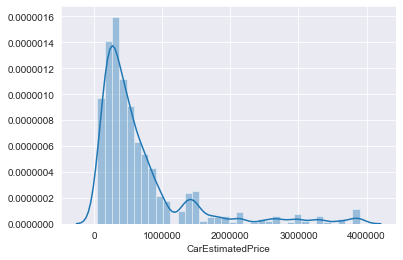

In [97]:
# distplot of original y_test dataset
sns.distplot(y_test)

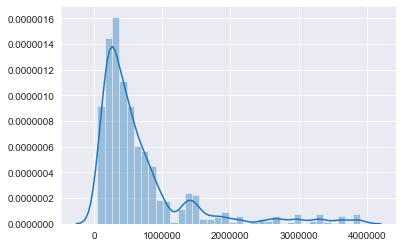

In [98]:
# distplot of predicted y test dataset
sns.distplot(pred)

Observation: We can see that from the above distplot of y_test and predicted y_test they both look exactly similar, we see very less differences.

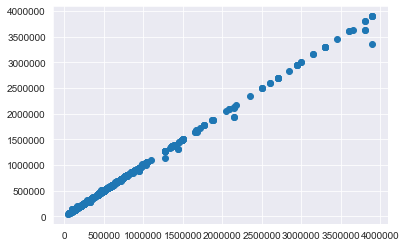

In [99]:
# scatter plot of y_test and predicted y_test dataset
plt.scatter(y_test, pred)

Observation: we can see that both the y_test and predicted y_test datasets falls in one line.

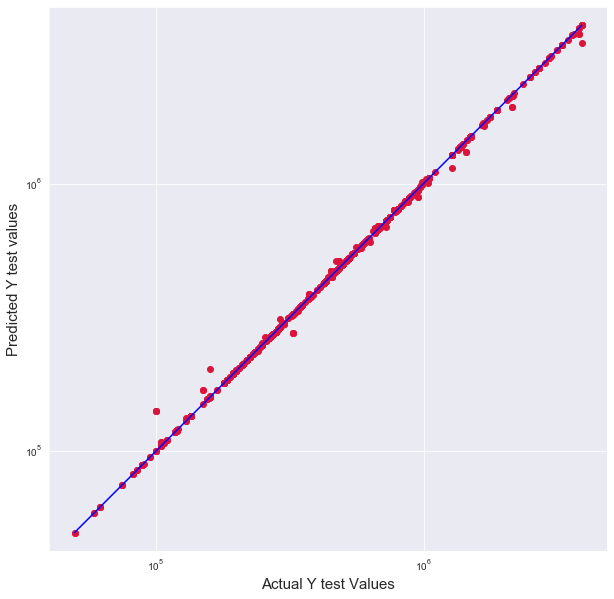

In [100]:
# plotting y test and predicted y test values:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Y test Values', fontsize=15)
plt.ylabel('Predicted Y test values', fontsize=15)
plt.axis('equal')
plt.show()

Observation: we can see that both the y_test and predicted y_test datasets falls in one line.
we can say that our model is very well made and have good accuracy score.

# SAVING THE MODEL:

In [103]:
import joblib
joblib.dump(rf, 'Vaibhav_Car_Price_Prediction_project_Model.pkl')

['Vaibhav_Car_Price_Prediction_project_Model.pkl']

In [104]:
#Reloading the model and predicting the dataset.
CarPricePrediction_randomforestreg_model = joblib.load('Vaibhav_Car_Price_Prediction_project_Model.pkl')
CarPricePrediction_randomforestreg_model.predict(x_train)

array([ 275000.,  495000., 1499000., ..., 3800000.,  235000.,  550000.])

# THANK YOU

Name: Vaibhav Tayade
    
contact details: 8087970061
    
Email Id: vaibhav_t29@rediffmail.com